<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## Simple Linear Regression    

In this notebook, we will:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model

### Importing Needed packages


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%pip install Pyarrow


   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.8 MB 2.3 MB/s eta 0:00:11
   ---------------------------------------- 0.2/24.8 MB 3.0 MB/s eta 0:00:09
    --------------------------------------- 0.6/24.8 MB 4.5 MB/s eta 0:00:06
   - -------------------------------------- 1.1/24.8 MB 7.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.2/24.8 MB 10.8 MB/s eta 0:00:03
   ----- ---------------------------------- 3.5/24.8 MB 14.0 MB/s eta 0:00:02
   ------- -------------------------------- 4.8/24.8 MB 16.2 MB/s eta 0:00:02
   --------- ------------------------------ 6.1/24.8 MB 18.4 MB/s eta 0:00:02
   ----------- ---------------------------- 7.4/24.8 MB 18.8 MB/s eta 0:00:01
   ------------- -------------------------- 8.1/24.8 MB 19.1 MB/s eta 0:00:01
   -------------- ------------------------- 9.0/24.8 MB 19.2 MB/s eta 0:00:01
   --------------- ------------------------ 9.8/24.8 MB 18.9 MB/s eta 0:00:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


### Understanding the Data

#### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### Reading the data in

In [6]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.

In [7]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


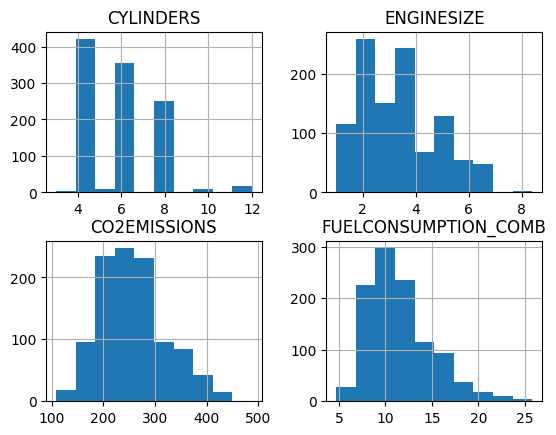

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


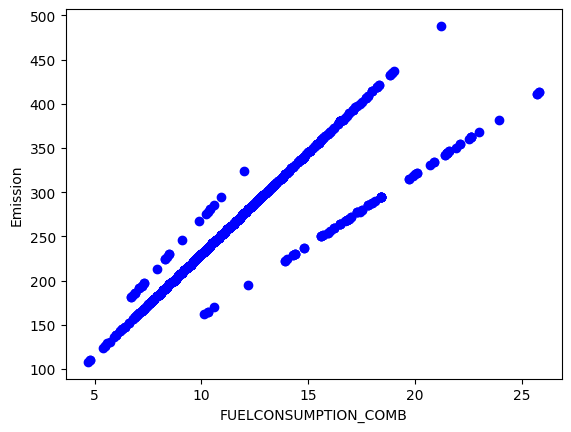

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

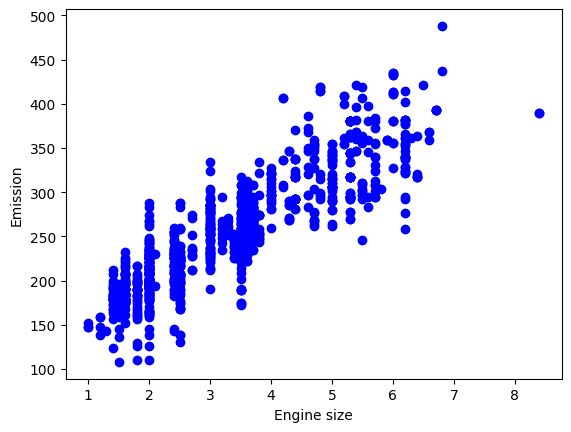

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Plotting __CYLINDER__ vs the Emission, to see how linear is their relationship is:

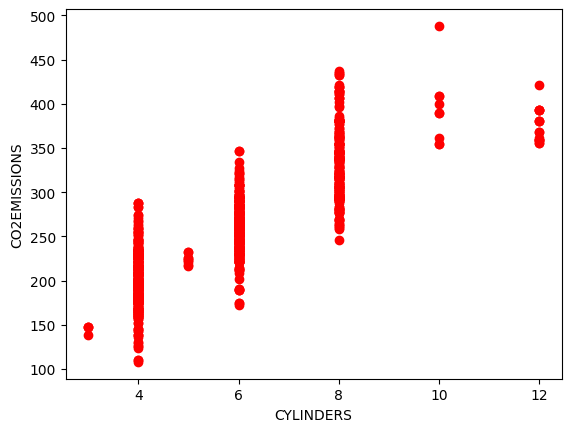

In [13]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, we train a model with the training set and test with the testing set. 

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [16]:
len(df)

1067

In [17]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [19]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
4,3.5,6,10.6,244
5,3.5,6,10.0,230
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [20]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
3,3.5,6,11.1,255
18,5.9,12,15.6,359
23,2.0,4,10.0,230
24,2.0,4,9.3,214
31,4.0,8,11.3,260
...,...,...,...,...
1034,1.8,4,8.2,189
1037,2.0,4,9.0,207
1038,2.0,4,9.0,207
1040,2.0,4,6.9,186


In [31]:
np.asanyarray(train['ENGINESIZE'])

array([2. , 2.4, 1.5, 3.5, 3.5, 3.5, 3.7, 3.7, 2.4, 2.4, 3.5, 5.9, 5.9,
       4.7, 4.7, 4.7, 4.7, 2. , 2. , 2. , 2. , 2. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 6.3, 3. , 2. , 3. , 2. , 3. , 4.2, 4.2, 5.2, 4.2,
       4.2, 5.2, 4.2, 4.2, 4. , 3. , 3. , 4. , 4. , 4. , 2. , 2. , 2. ,
       2. , 4. , 6. , 4. , 6. , 6. , 6. , 6.8, 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 3. , 3. , 3. , 2. , 2. , 2. , 3. , 3. , 3. , 3. , 2. ,
       3. , 4.4, 4.4, 4.4, 4.4, 3. , 6. , 3. , 3. , 4.4, 4.4, 4.4, 4.4,
       4.4, 4.4, 4.4, 4.4, 4.4, 2. , 3. , 2. , 3. , 3. , 4.4, 4.4, 3. ,
       2. , 3. , 3. , 3. , 3.6, 3.6, 1.4, 1.4, 3.6, 3.6, 3.6, 3.6, 2.4,
       2. , 2. , 2.4, 2. , 2.4, 2. , 2. , 2.5, 3.6, 2. , 3.6, 3.6, 3.6,
       2. , 3.6, 3.6, 3. , 3.6, 6.2, 6.2, 6.2, 6.2, 6.2, 6.2, 3.6, 3.6,
       3.6, 3.6, 3.6, 3.6, 6.2, 6.2, 6.2, 1.4, 1.8, 2. , 1.4, 2.4, 3.6,
       2.4, 3.6, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 5.3, 4.8,
       6. , 6. , 6. , 6. , 2.5, 3.6, 3.6, 2. , 2.5, 2.4, 2.4, 4.

### Simple Regression Model

#### Train data distribution


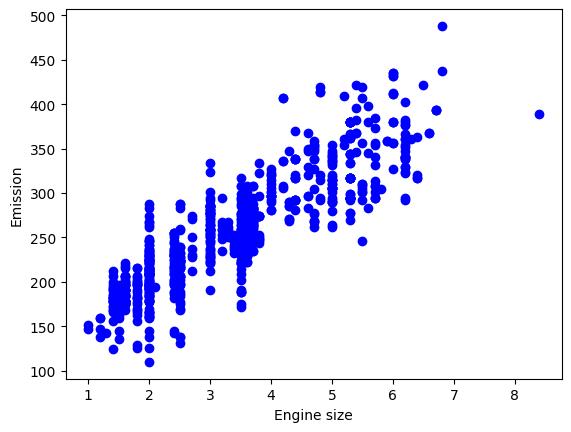

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.


In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
type(regr.coef_)
type(regr.intercept_)

Coefficients:  [[39.2736572]]
Intercept:  [124.97685286]


numpy.ndarray

Given that this is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 

#### Plot outputs

We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

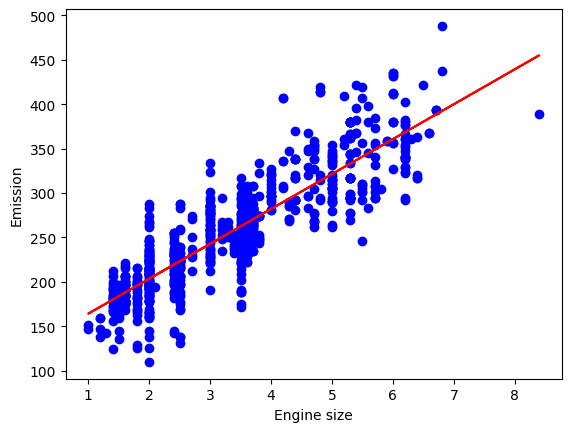

In [42]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], color='red' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, let's use MSE(Mean Squared Error) here to calculate the accuracy of our model based on the test set: 

The % operator in Python for strings is used for string substitution.

See this on Stackoverflow: https://stackoverflow.com/questions/20450531/python-operator-in-print-statement

In [49]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.46
Residual sum of squares (MSE): 912.39
R2-score: 0.77


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [ ]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

Now train a Linear Regression Model using the `train_x` we created and the `train_y` created previously

In [50]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

Find the predictions using the model's `predict` function and the `test_x` data

In [53]:
predictions = regr.predict(test_y)

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [54]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 9812.11


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


##### © IBM Corporation 2020. All rights reserved.
